---

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sympy
from sympy.geometry import Point, Line

---

---

---

In [31]:
# plotting parameters
plt.figure(figsize=(15,15));
lw=3                        # constraint boundary linewdith
qw=0.0005                   # gradient vector width
qs=2                        # gradient vector scale
ps=250                      # point size

def get_intersection (a, b, c, d):
    """Compute the xy-coordinates of the intersection of two linear constraints."""
    l1=Line(Point(a), Point(b))
    l2=Line(Point(c), Point(d))
    intersection=l1.intersection(l2)[0]
    print(intersection)
    return sympy.Float(intersection[0]), sympy.Float(intersection[1])

def plot_constraint (x, g, delg, intercept, delz, lw, l, qw, qs, ps, c):
    """Draw a single linear constraint."""
    
    # draw the gradient vector of the linear constraint from the origin
    plt.quiver(0, 0, delg[0], delg[1], width=qw, scale=qs, scale_units='xy', color=c);
    
    # compute the intersection of the linear constraint boundary and the path of its gradient vector
    a, b = get_intersection((0, intercept), (delg[1], -delg[0] + intercept), (0, 0), (delg[0], delg[1]))
    
    # draw the point of intersection
    plt.scatter(a, b, s=ps, color=c);
    
    # draw the gradient vector of the objective function
    plt.quiver(np.float(a), np.float(b), delz[0], delz[1], width=2*qw, scale=qs, scale_units='xy', color='black');
    
    # determine and draw the direction of maximization of the objective function along the linear constraint boundary
    dd1, dd2 = np.dot(np.array(delz), np.array([-delg[1], delg[0]])), np.dot(np.array(delz), np.array([delg[1], -delg[0]]))
    if dd1 > dd2:
        plt.quiver(np.float(a), np.float(b), -delg[1], delg[0], color=c);
        # draw the linear constraint boundary
        plt.plot(x, g, linewidth=lw, label=l, color=c);
    elif dd2 > dd1:
        plt.quiver(np.float(a), np.float(b), delg[1], -delg[0], color=c);
        # draw the linear constraint boundary
        plt.plot(x, g, linewidth=lw, label=l, color=c);
    else:
        # draw the linear constraint boundary
        plt.plot(x, g, linewidth=3*lw, label=l, color=c);

def get_solution (delg_a, delg_b, gi_a, gi_b, delz, ac=None, opt='max'):
    """Determine and draw the solution, given the two intersecting lines which point to the optimal set."""
    
    # determine and draw the optimal set
    argmax_x1, argmax_x2 = get_intersection((0, gi_a), (delg_a[1], -delg_a[0] + gi_a), (0, gi_b), (delg_b[1], -delg_b[0] + gi_b))
    
    if opt=='max':
        plt.scatter(argmax_x1, argmax_x2, s=2*ps, color='k', zorder=100);
    elif opt=='min':
        plt.scatter(argmax_x1, argmax_x2, s=2*ps, color='w', zorder=100);
    
    # compute the optimal value
    if (ac != None):
        optZ = delz[0]*argmax_x1 + delz[1]*argmax_x2 + ac
    else:
        optZ = delz[0]*argmax_x1 + delz[1]*argmax_x2

    print()
    print("Optimal Set:\t({:.2f}, {:.2f})".format(argmax_x1, argmax_x2))
    print("Optimal Value:\t{:.2f}".format(optZ))

<Figure size 1080x1080 with 0 Axes>

---

# Quiz 3

Define $c,d,x,A,b$ s.t.<br>
Max $cx+d$<br>
$Ax=b$<br>
$x\geq0$<br>
is equivalent to the Linear Program<br>
min $f(y,z)=-6y+9z-8$<br>
s.t.<br>
$3y-5z\leq15$<br>
$-2y+7z\geq-14$<br>
$5y+4z=20$<br>

---

# Quiz 2
Let $u=(-3,8),v=(7,-4),w=(3,21),x=(1,10)$. Express $x$ as a convex combination of $u,v,$ and $w$. That is, find $c_1,c_2,c_3$ s.t.<br>
$c_i\geq0,$ $\forall i$<br>
$c_1+c_2+c_3=1$<br>
$x=c_1\cdot u+c_2\cdot v+c_3\cdot w$<br>

---

# Quiz 1

#### Linear Program<br>
__max $Z(x,y)=-3x-6y+8$ in $\mathbb{R}^2$__<br>
s.t.<br>
$g_1(x,y)=-3x-2y\leq-6=b_1$ or $y\geq-\frac{3}{2}x+3$<br>
$g_2(x,y)=5x-2y\leq40=b_2$ or $y\geq\frac{5}{2}x-20$<br>
$g_3(x,y)=2x+4y\geq-8=b_3$ or $y\geq-\frac{1}{2}x-2$<br>
$g_4(x,y)=x+y\leq5=b_4$ or $y\leq-x+5$<br>

#### Objective Function<br>
$Z(x,y)=-3x-6y+8$<br>

#### Gradient of Objective Function<br>
$\nabla Z=(-3,-6)$<br>

#### Gradients of Linear Constraints $\nabla g_i=(c_1,c_2)$<br>
$\nabla g_1=(-3,-2)$<br>
$\nabla g_2=(5,-2)$<br>
$\nabla g_3=(2,4)$<br>
$\nabla g_4=(1,1)$<br>

#### Direction Vectors $v_i=(c_2,-c_1)$<br>
$v_1=(-2,3)$ points NW<br>
$v_2=(-2,-5)$ points SW<br>
$v_3=(4,-2)$ points SE<br>
$v_4=(1,-1)$ points SE<br>

#### Directional Derivatives and Direction of Optimization<br>
$\nabla Z\cdot v_1=-3\cdot-2-6\cdot3<0\rightarrow$ SE maximization<br>
$\nabla Z\cdot v_2=-3\cdot-2-6\cdot-5>0\rightarrow$ SW maximization<br>
$\nabla Z\cdot v_3=-3\cdot4-6\cdot-2=0\rightarrow$ level set<br>
$\nabla Z\cdot v_4=-3\cdot1-6\cdot-1>0\rightarrow$ SE maximization<br>

### Solution

#### Optimal Set
argmax$_{\Gamma}(f)=\{x$ | $y=-\frac{1}{2}x-2,x\in[5,6]\}$<br>

#### Optimal Value
max$_{\Gamma}(f)=-3(5)-6(-4.5)+8=-15+27+8=20$<br>

Point2D(18/13, 12/13)
Point2D(200/29, -80/29)
Point2D(-4/5, -8/5)
Point2D(5/2, 5/2)
Point2D(5, -9/2)

Optimal Set:	(5.00, -4.50)
Optimal Value:	20.00
Point2D(6, -5)

Optimal Set:	(6.00, -5.00)
Optimal Value:	20.00


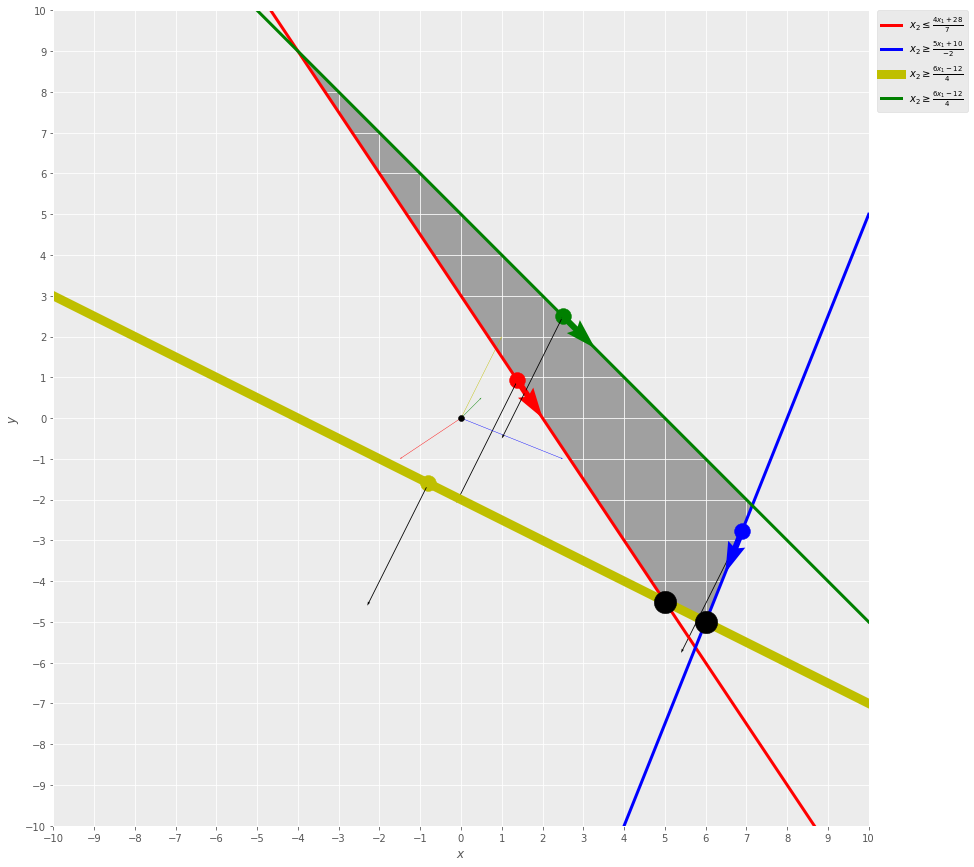

In [18]:
x=np.linspace(-10,10,1001)
g1=(3*x-6)/-2
g2=(-5*x+40)/-2
g3=(-2*x-8)/4
g4=-x+5

# late(x) labels
g1x=r'$x_2\leq\frac{4x_1+28}{7}$'
g2x=r'$x_2\geq\frac{5x_1+10}{-2}$'
g3x=r'$x_2\geq\frac{6x_1-12}{4}$'
g4x=r'$x_2\geq\frac{6x_1-12}{4}$'

# (i)ntercepts
g1i=3
g2i=-20
g3i=-2
g4i=5

delz=(-3,-6)
ac=8

delg1=(-3,-2)
delg2=(5,-2)
delg3=(2,4)
delg4=(1,1)


plt.figure(figsize=(15,15));

# draw g1
plot_constraint(x, g1, delg1, g1i, delz, lw, g1x, qw, qs, ps, 'r')
# draw g2
plot_constraint(x, g2, delg2, g2i, delz, lw, g2x, qw, qs, ps, 'b')
# draw g3
plot_constraint(x, g3, delg3, g3i, delz, lw, g3x, qw, qs, ps, 'y')
# draw g4
plot_constraint(x, g4, delg4, g4i, delz, lw, g4x, qw, qs, ps, 'g')
# fill the feasible region
fx, fy = np.meshgrid(x, x)
plt.imshow(((-2*fy<=3*fx-6) & (-2*fy<=-5*fx+40) & (4*fy>=-2*fx-8) & (fy<=-fx+5)).astype(int),
           extent=(fx.min(), fx.max(), fy.min(), fy.max()),
           origin='lower',
           cmap="Greys",
           alpha=0.3);


get_solution(delg1, delg3, g1i, g3i, delz, ac)
get_solution(delg2, delg3, g2i, g3i, delz, ac)


#####
#
# plot configuration
#
#####
scale=10
step=1
xlabel='$x$'
ylabel='$y$'
# zoom
plt.xlim((-scale, scale))
plt.xticks(np.arange(-scale, scale+step, step))
plt.ylim((-scale, scale))
plt.yticks(np.arange(-scale, scale+step, step))
# draw the origin
plt.scatter(0, 0, color='black');
# labels and legend
plt.xlabel(xlabel);
plt.ylabel(ylabel);
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.);
# remove gridlines
#plt.grid(False);

---

#### Linear Program<br>
__max $Z(x_1,x_2)=-3x_1+2x_2$ in $\mathbb{R}^2$__<br>
s.t.<br>
$g_1(x_1,x_2)=-4x_1+7x_2\leq28$ or $x_2\leq\frac{4x_1+28}{7}$<br>
$g_2(x_1,x_2)=-5x_1-2x_2\leq10$ or $x_2\geq\frac{5x_1+10}{-2}$<br>
$g_3(x_1,x_2)=-6x_1+4x_2\geq-12$ or $x_2\geq\frac{6x_1-12}{4}$<br>
$g_4(x_1,x_2)=-x_1-x_2\geq-8$ or $x_2\leq-x_1+8$<br>

#### Objective Function<br>
$Z(x_1,x_2)=-3x_1+2x_2$<br>

#### Gradient of Objective Function<br>
$\nabla Z=(-3,2)$<br>

#### Gradients of Linear Constraints $\nabla g_i=(c_1,c_2)$<br>
$\nabla g_1=(-4,7)$<br>
$\nabla g_2=(-5,-2)$<br>
$\nabla g_3=(-6,4)$<br>
$\nabla g_4=(-1,-1)$<br>

#### Direction Vectors $v_i=(c_2,-c_1)$<br>
$v_1=(7,4)$ points NE<br>
$v_2=(-2,5)$ points NW<br>
$v_3=(4,6)$ points NE<br>
$v_4=(-1,1)$ points NW<br>

#### Directional Derivatives and Direction of Optimization<br>
$\nabla Z\cdot v_1=-3\cdot7+2\cdot4<0\rightarrow$ SW maximization<br>
$\nabla Z\cdot v_2=-3\cdot-2+2\cdot5>0\rightarrow$ NW maximization<br>
$\nabla Z\cdot v_3=-3\cdot4+2\cdot6=0\rightarrow$ level set<br>
$\nabla Z\cdot v_4=-3\cdot-1+2\cdot1>0\rightarrow$ NW maximization<br>

### Solution

#### Optimal Set
argmax$_{\Gamma}(f)=\left\{\left(-\frac{126}{43},\frac{100}{43}\right)\right\}$<br>

$\frac{4}{7}x_1+4=-\frac{5}{2}x_1-5$<br>
$\frac{4}{7}x_1+\frac{5}{2}x_1=-5-4$<br>
$\frac{8}{14}x_1+\frac{35}{14}x_1=-9$<br>
$\frac{43}{14}x_1=-9$<br>
$x_1=(\frac{14}{43})(-9)=-\frac{126}{43}$<br>
$x_2=\frac{4}{7}(-\frac{126}{43})+4=-\frac{504}{301}+4=-\frac{72}{43}+\frac{172}{43}=\frac{100}{43}$

#### Optimal Value
max$_{\Gamma}(f)=\frac{578}{43}=13.44$<br>

$-3x_1+2x_2=-3(-\frac{126}{43})+2(\frac{100}{43})=\frac{378}{43}+\frac{200}{43}=\frac{578}{43}=13.44$<br>

Point2D(-112/65, 196/65)
Point2D(-50/29, -20/29)
Point2D(18/13, -12/13)
Point2D(4, 4)
Point2D(-126/43, 100/43)

Optimal Set:	(-2.93, 2.33)
Optimal Value:	13.44


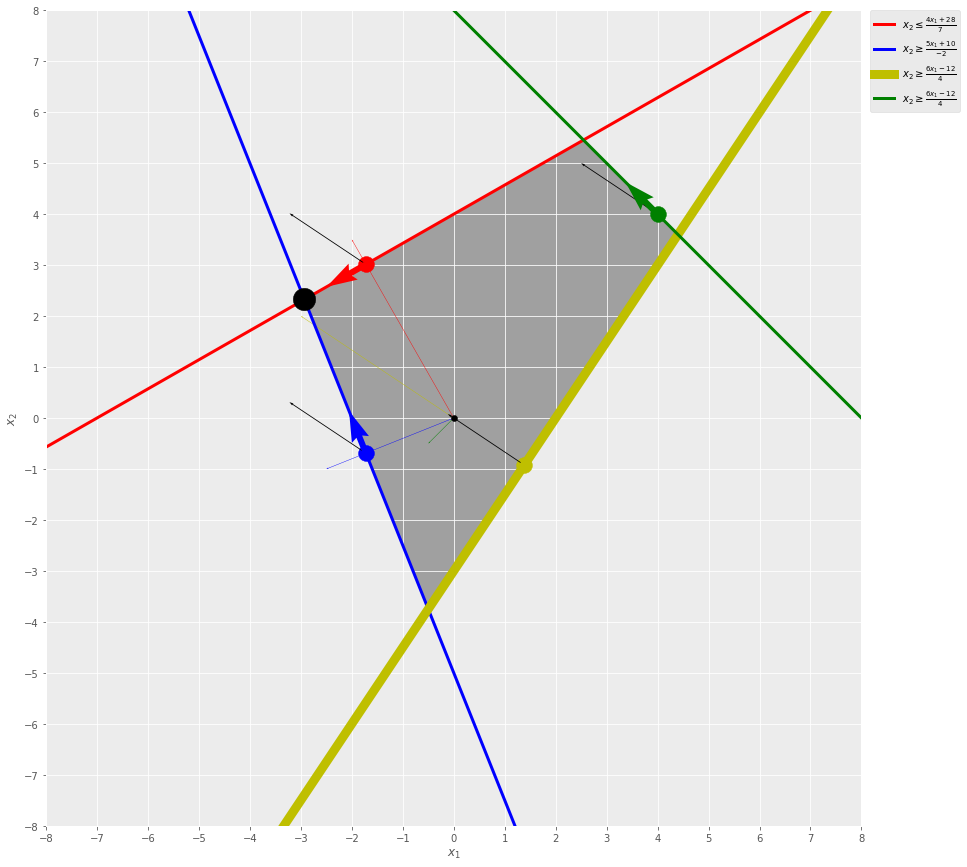

In [19]:
x=np.linspace(-10,10,1001)
g1=(4*x+28)/7
g2=(5*x+10)/-2
g3=(6*x-12)/4
g4=-(x-8)

# late(x) labels
g1x=r'$x_2\leq\frac{4x_1+28}{7}$'
g2x=r'$x_2\geq\frac{5x_1+10}{-2}$'
g3x=r'$x_2\geq\frac{6x_1-12}{4}$'
g4x=r'$x_2\geq\frac{6x_1-12}{4}$'

# (i)ntercepts
g1i=4
g2i=-5
g3i=-3
g4i=8

delz=(-3,2)
delg1=(-4,7)
delg2=(-5,-2)
delg3=(-6,4)
delg4=(-1,-1)


plt.figure(figsize=(15,15));

# draw g1
plot_constraint(x, g1, delg1, g1i, delz, lw, g1x, qw, qs, ps, 'r')
# draw g2
plot_constraint(x, g2, delg2, g2i, delz, lw, g2x, qw, qs, ps, 'b')
# draw g3
plot_constraint(x, g3, delg3, g3i, delz, lw, g3x, qw, qs, ps, 'y')
# draw g4
plot_constraint(x, g4, delg4, g4i, delz, lw, g4x, qw, qs, ps, 'g')
# fill the feasible region
fx, fy = np.meshgrid(x, x)
plt.imshow(((7*fy<=4*fx+28) & (-2*fy<=5*fx+10) & (4*fy>=6*fx-12) & (-fy>=fx-8)).astype(int),
           extent=(fx.min(), fx.max(), fy.min(), fy.max()),
           origin='lower',
           cmap="Greys",
           alpha=0.3);


get_solution(delg1, delg2, g1i, g2i, delz)


#####
#
# plot configuration
#
#####
scale=8
step=1
xlabel='$x_1$'
ylabel='$x_2$'
# zoom
plt.xlim((-scale, scale))
plt.xticks(np.arange(-scale, scale+step, step))
plt.ylim((-scale, scale))
plt.yticks(np.arange(-scale, scale+step, step))
# draw the origin
plt.scatter(0, 0, color='black');
# labels and legend
plt.xlabel(xlabel);
plt.ylabel(ylabel);
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.);
# remove gridlines
#plt.grid(False);

---

# Assignments

---

## 2. Convexity

---

1.<br>
Consider the two constraints<br>
$g_1(x_1,x_2)=3x_1-7x_2\geq12=b_1,$<br>
$g_2(x_1,x_2)=-2x_1+5x_2\geq-20=b_2$.<br>
a. Graph the boundaries of the two constraints.<br>
b. Pick two feasible points $x=(x_1,x_2)$ and $y=(y_1,y_2)$ and verify their feasibility by computing $g_1(x),g_2(x),g_1(y),$ and $g_2(y)$.<br>
c. Plot your two feasible points on the graph.<br>
d. Compute $\lambda x+(1-\lambda)y$ for $\lambda=0,\frac{1}{5},\frac{1}{2},\frac{3}{4},1$.<br>
e. Verify the feasibility of your five new points $\lambda x+(1-\lambda)y$ by computing $g_1(\lambda x+(1-\lambda)y)$ and $g_2(\lambda x+(1-\lambda)y)$.<br>
f. Plot your five new feasible points $\lambda x+(1-\lambda)y$.<br>

---

2.<br>
Let $x_1=(1,2),x_2=(4,7),$ and $x_3=(8,3)$.<br>
a. On a new graph, plot $x_1,x_2,$ and $x_3$.<br>
b. Let $c_1=\frac{1}{3},c_2=\frac{1}{3},c_3=\frac{1}{3},$ and compute and plot $\sum_{i=1}^3c_ix_i$.<br>
c. Let $c_1=\frac{1}{3},c_2=\frac{2}{3},c_3=0,$ and compute and plot $\sum_{i=1}^3c_ix_i$.<br>
d. Let $c_1=\frac{2}{3},c_2=0,c_3=\frac{1}{3},$ and compute and plot $\sum_{i=1}^3c_ix_i$.<br>
e. Let $c_1=0,c_2=\frac{1}{3},c_3=\frac{2}{3},$ and compute and plot $\sum_{i=1}^3c_ix_i$.<br>
f. Let $c_1=\frac{2}{3},c_2=\frac{1}{6},c_3=\frac{1}{6},$ and compute and plot $\sum_{i=1}^3c_ix_i$.<br>
g. Let $c_1=\frac{1}{6},c_2=\frac{2}{3},c_3=\frac{1}{6},$ and compute and plot $\sum_{i=1}^3c_ix_i$.<br>
h. Let $c_1=\frac{1}{12},c_2=\frac{1}{4},c_3=\frac{2}{3},$ and compute and plot $\sum_{i=1}^3c_ix_i$.<br>
i. Let $c_1=\frac{2}{3},c_2=\frac{2}{3},c_3=\frac{2}{3},$ and compute and plot $\sum_{i=1}^3c_ix_i$.<br>
j. Let $c_1=2,c_2=0,c_3=\frac{8}{3},$ and compute and plot $\sum_{i=1}^3c_ix_i$.<br>
k. Which of $(b)$ through $(j)$ are convex combinations?<br>
l. What do the convex combinations have in common, geometrically?<br>
m. What does point $(i)$ demonstrate? What does point $(j)$ demonstrate?<br>

---

3.<br>
Prove that the feasible set of a Linear Program is convex.<br>

---

4.<br>
Prove that the optimal set of a Linear Program is convex.<br>

---

5.<br>
Let $a_1=(4,2),a_2=(-2,6),$ and $a_3=(2,5)$.<br>
a. Describe geometrically the set of all linear combinations of $a_1,a_2,$ and $a_3$.<br>
b. Describe geometrically the set of all linear combinations of $a_1,a_2,$ and $a_3$ using nonnegative coefficients.<br>
c. Describe geometrically all convex combinations of $a_1,a_2,$ and $a_3$.<br>

---

6.<br>
Let $F$ be the feasible region w.r.t. the following constraints:<br>
$x_1+x_2\leq10$<br>
$-x_1+x_2\leq6$<br>
$x_1-4x_2\leq0$<br>
a. Plot the constraints and identify $F$.<br>
b. Characterize $F$ as the convex hull of its extreme points which you can label $p_{12},p_{13},$ and $p_{23}$.<br>
c. Verify that $x=(2,4)$ is in $F$ by both checking numerically that it satisfies all three constraints and also by plotting the point in the graph with $F$.<br>
d. Express $x$ as a convex combination of the extreme points of $F$. That is, find nonnegative real numbers $c_1,c_2,$ and $c_3$ that sum to unity s.t. $c_1x_1+c_2x+2+c_3x_3=x$.<br>

---

## 1. Graphical Method

---

#### Linear Program<br>
__max $Z(x_1,x_2)=-2x_1-x_2+2$ in $\mathbb{R}^2$__<br>
s.t.<br>
$g_1(x_1,x_2)=3x_1-7x_2\geq12$ or $x_2\leq\frac{3}{7}x_1-\frac{12}{7}$<br>
$g_2(x_1,x_2)=-2x_1+5x_2\geq-20$ or $x_2\geq\frac{2}{5}x_1-4$<br>
$g_3(x_1,x_2)=x_1+3x_2\leq-3$ or $x_2\leq-\frac{1}{3}x_1-1$<br>
$g_4(x_1,x_2)=-4x_1-x_2\leq8$ or $x_2\geq-4x_1-8$<br>

#### Objective Function<br>
$Z(x_1,x_2)=-2x_1-x_2+2$<br>

#### Gradient of Objective Function<br>
$\nabla Z=(-2,-1)$<br>

#### Gradients of Linear Constraints $\nabla g_i=(c_1,c_2)$<br>
$\nabla g_1=(3,-7)$<br>
$\nabla g_2=(-2,5)$<br>
$\nabla g_3=(1,3)$<br>
$\nabla g_4=(-4,-1)$<br>

#### Direction Vectors $v_i=(c_2,-c_1)$<br>
$v_1=(-7,-3)$ points SW<br>
$v_2=(5,2)$ points NE<br>
$v_3=(3,-1)$ points SE<br>
$v_4=(1,-4)$ points NE<br>

#### Directional Derivatives and Direction of Optimization<br>
$\nabla Z\cdot v_1=-2\cdot-7-1\cdot-3>0\rightarrow$ SW maximization<br>
$\nabla Z\cdot v_2=-2\cdot5-1\cdot2<0\rightarrow$ SW maximization<br>
$\nabla Z\cdot v_3=-2\cdot3-1\cdot-1<0\rightarrow$ NW maximization<br>
$\nabla Z\cdot v_4=-2\cdot1-1\cdot-4>0\rightarrow$ NE maximization<br>

### Solution

#### Optimal Set
argmax$_{\Gamma}(f)=\left\{\left(-\frac{10}{11},-\frac{48}{11}\right)\right\}$<br>

$
\begin{align}
g_2(x_1,x_2)&=-2x_1+5x_2=-20\\
g_4(x_1,x_2)&=-4x_1-x_2=8\\
\end{align}
$

$
\begin{bmatrix}
-2 & 5 & -20\\
-4 & -1 & 8\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
-2 & 5 & -20\\
0 & -11 & 48\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & -\frac{5}{2} & 10\\
0 & -11 & 48\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & -\frac{5}{2} & 10\\
0 & 1 & -\frac{48}{11}\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 0 & -\frac{10}{11}\\
0 & 1 & -\frac{48}{11}\\
\end{bmatrix}
$

#### Optimal Value
max$_{\Gamma}(f)=\frac{90}{11}=8.18$<br>

$Z(x_1,x_2)=-2x_1-x_2+2=-2(-\frac{10}{11})-(-\frac{48}{11})+2=\frac{20}{11}+\frac{48}{11}+\frac{22}{11}=\frac{90}{11}$<br>

Point2D(18/29, -42/29)
Point2D(40/29, -100/29)
Point2D(-3/10, -9/10)
Point2D(-32/17, -8/17)
Point2D(-10/11, -48/11)

Optimal Set:	(-0.91, -4.36)
Optimal Value:	8.18


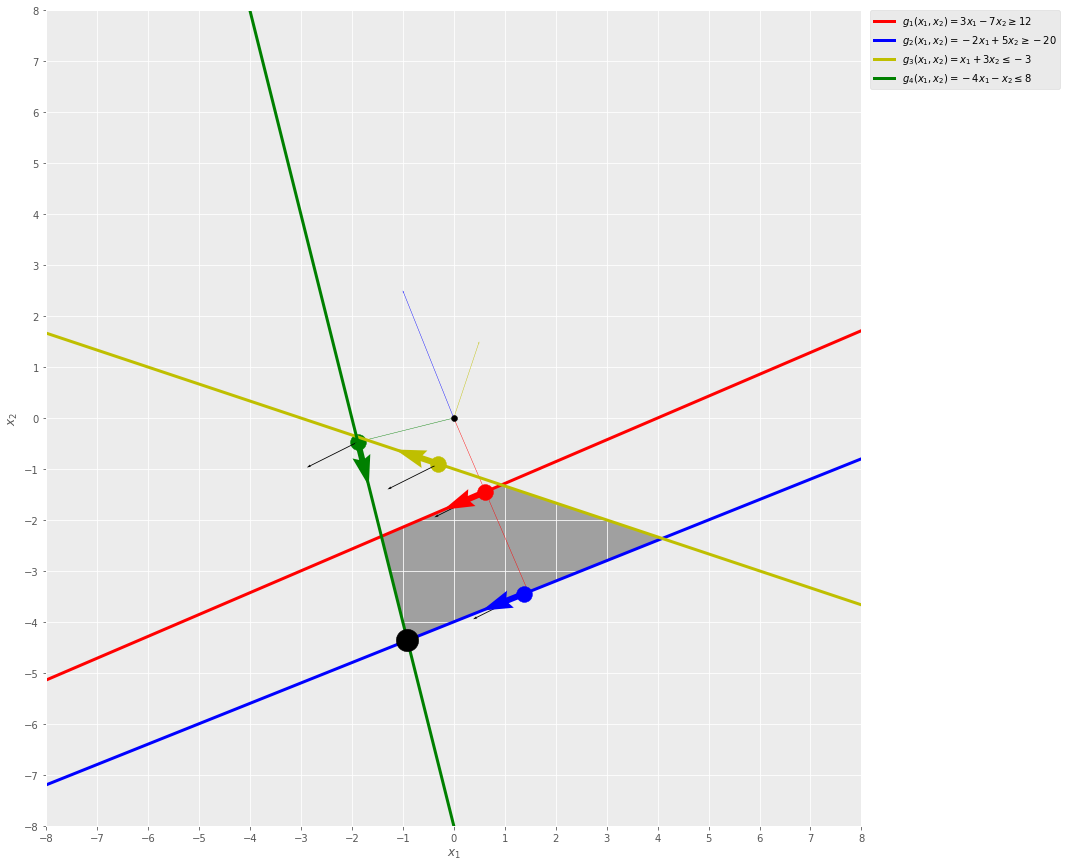

In [20]:
x=np.linspace(-10,10,1001)
g1=(3/7)*x-(12/7)
g2=(2/5)*x-4
g3=-(1/3)*x-1
g4=-4*x-8

# late(x) labels
g1x=r'$g_1(x_1,x_2)=3x_1-7x_2\geq12$'
g2x=r'$g_2(x_1,x_2)=-2x_1+5x_2\geq-20$'
g3x=r'$g_3(x_1,x_2)=x_1+3x_2\leq-3$'
g4x=r'$g_4(x_1,x_2)=-4x_1-x_2\leq8$'

# (i)ntercepts
g1i=-(12/7)
g2i=-4
g3i=-1
g4i=-8

delz=(-2,-1)
ac=2

delg1=(3,-7)
delg2=(-2,5)
delg3=(1,3)
delg4=(-4,-1)


plt.figure(figsize=(15,15));

# draw g1
plot_constraint(x, g1, delg1, g1i, delz, lw, g1x, qw, qs, ps, 'r')
# draw g2
plot_constraint(x, g2, delg2, g2i, delz, lw, g2x, qw, qs, ps, 'b')
# draw g3
plot_constraint(x, g3, delg3, g3i, delz, lw, g3x, qw, qs, ps, 'y')
# draw g4
plot_constraint(x, g4, delg4, g4i, delz, lw, g4x, qw, qs, ps, 'g')
# fill the feasible region
fx, fy = np.meshgrid(x, x)
plt.imshow(((-7*fy>=-3*fx+12) & (5*fy>=2*fx-20) & (3*fy<=-fx-3) & (-fy<=4*fx+8)).astype(int),
           extent=(fx.min(), fx.max(), fy.min(), fy.max()),
           origin='lower',
           cmap="Greys",
           alpha=0.3);


get_solution(delg2, delg4, g2i, g4i, delz, ac)


#####
#
# plot configuration
#
#####
scale=8
step=1
xlabel='$x_1$'
ylabel='$x_2$'
# zoom
plt.xlim((-scale, scale))
plt.xticks(np.arange(-scale, scale+step, step))
plt.ylim((-scale, scale))
plt.yticks(np.arange(-scale, scale+step, step))
# draw the origin
plt.scatter(0, 0, color='black');
# labels and legend
plt.xlabel(xlabel);
plt.ylabel(ylabel);
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.);
# remove gridlines
#plt.grid(False);

---

#### Linear Program<br>
__min and max $Z(x_1,x_2)=6x_1+x_2-2$ in $\mathbb{R}^2$__<br>
s.t.<br>
$g_1(x_1,x_2)=3x_1-2x_2\leq12=b_1$ or $x_2\geq\frac{3}{2}x_1-6$<br>
$g_2(x_1,x_2)=2x_1+5x_2\geq-20=b_2$ or $x_2\geq-\frac{2}{5}x_1-4$<br>
$g_3(x_1,x_2)=-x_1-6x_2\geq-12=b_3$ or $x_2\leq-\frac{1}{6}x_1+2$<br>
$g_4(x_1,x_2)=-x_1+2x_2\leq4=b_4$ or $x_2\leq\frac{1}{2}x_1+2$<br>
$g_5(x_1,x_2)=6x_1+x_2\geq-30=b_5$ or $x_2\geq-6x_1-30$<br>

#### Objective Function<br>
$Z(x_1,x_2)=6x_1+x_2-2$<br>

#### Gradient of Objective Function<br>
$\nabla Z=(6,1)$<br>

#### Gradients of Linear Constraints $\nabla g_i=(c_1,c_2)$<br>
$\nabla g_1=(3,-2)$<br>
$\nabla g_2=(2,5)$<br>
$\nabla g_3=(-1,-6)$<br>
$\nabla g_4=(1,2)$<br>
$\nabla g_5=(6,1)$<br>

#### Direction Vectors $v_i=(c_2,-c_1)$<br>
$v_1=(-2,-3)$ points SW<br>
$v_2=(5,-2)$ points SE<br>
$v_3=(-6,1)$ points NW<br>
$v_4=(2,1)$ points NE<br>
$v_5=(1,-6)$ points SE<br>

#### Directional Derivatives and Direction of Optimization<br>
$\nabla Z\cdot v_1=6\cdot-2+1\cdot-3<0\rightarrow$ NE maximization<br>
$\nabla Z\cdot v_2=6\cdot5+1\cdot-2>0\rightarrow$ SE maximization<br>
$\nabla Z\cdot v_3=6\cdot-6+1\cdot1<0\rightarrow$ SE maximization<br>
$\nabla Z\cdot v_4=6\cdot2+1\cdot1>0\rightarrow$ NE maximization<br>
$\nabla Z\cdot v_5=6\cdot1+1\cdot-6=0\rightarrow$ level set<br>

### Solution

#### Max Set
argmax$_{\Gamma}(f)=\left\{\left(\frac{24}{5},\frac{6}{5}\right)\right\}$<br>

$
\begin{align}
g_1(x_1,x_2)&=3x_1-2x_2\leq12=b_1\\
g_3(x_1,x_2)&=-x_1-6x_2\geq-12=b_3\\
\end{align}
$

$
\begin{bmatrix}
3 & -2 & 12\\
-1 & -6 & -12\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & -\frac{2}{3} & 4\\
-1 & -6 & -12\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & -\frac{2}{3} & 4\\
0 & -\frac{20}{3} & -8\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & -\frac{2}{3} & 4\\
0 & 1 & \frac{6}{5}\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 0 & \frac{24}{5}\\
0 & 1 & \frac{6}{5}\\
\end{bmatrix}
$

#### Max Value
max$_{\Gamma}(f)=28$<br>

$Z(\frac{24}{5},\frac{6}{5})=6x_1+x_2-2=6(\frac{24}{5})+(\frac{6}{5})-2=\frac{144}{5}+\frac{6}{5}-\frac{10}{5}=28$<br>

#### Min Set
argmax$_{\Gamma}(f)=\left\{x|x_2=-6x_1-30,x\in\left[-\frac{64}{13},-\frac{65}{14}\right]\right\}$<br>

$
\begin{align}
g_2(x_1,x_2)&=2x_1+5x_2\geq-20=b_2\\
g_5(x_1,x_2)&=6x_1+x_2\geq-30=b_5\\
\end{align}
$

$
\begin{bmatrix}
2 & 5 & -20\\
6 & 1 & -30\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
2 & 5 & -20\\
0 & -14 & 30\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & \frac{5}{2} & -10\\
0 & -14 & 30\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & \frac{5}{2} & -10\\
0 & 1 & -\frac{15}{7}\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 0 & -\frac{65}{14}\\
0 & 1 & -\frac{15}{7}\\
\end{bmatrix}
$

$
\begin{align}
g_4(x_1,x_2)&=-x_1+2x_2\leq4=b_4\\
g_5(x_1,x_2)&=6x_1+x_2\geq-30=b_5\\
\end{align}
$

$
\begin{bmatrix}
-1 & 2 & 4\\
6 & 1 & -30\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & -2 & -4\\
6 & 1 & -30\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & -2 & -4\\
0 & 13 & -6\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & -2 & -4\\
0 & 1 & -\frac{6}{13}\\
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 0 & -\frac{64}{13}\\
0 & 1 & -\frac{6}{13}\\
\end{bmatrix}
$

#### Min Value
max$_{\Gamma}(f)=-32$<br>

$Z(-\frac{64}{13},-\frac{6}{13})=6(-\frac{64}{13})+(-\frac{6}{13})-2=-\frac{384}{13}-\frac{6}{13}-\frac{26}{13}=-32$<br>

Point2D(36/13, -24/13)
Point2D(-40/29, -100/29)
Point2D(12/37, 72/37)
Point2D(-4/5, 8/5)
Point2D(-180/37, -30/37)
Point2D(24/5, 6/5)

Optimal Set:	(4.80, 1.20)
Optimal Value:	28.00
Point2D(-65/14, -15/7)

Optimal Set:	(-4.64, -2.14)
Optimal Value:	-32.00
Point2D(-64/13, -6/13)

Optimal Set:	(-4.92, -0.46)
Optimal Value:	-32.00


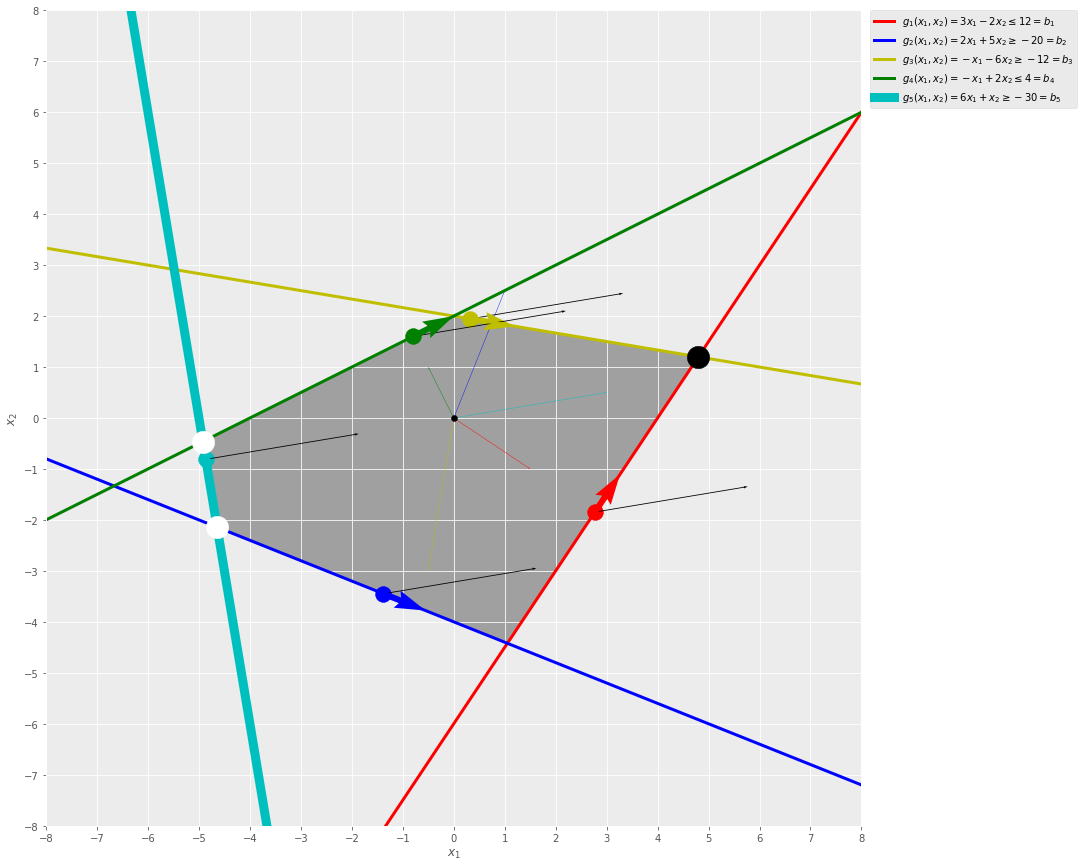

In [32]:
x=np.linspace(-10,10,1001)
g1=(3/2)*x-6
g2=-(2/5)*x-4
g3=-(1/6)*x+2
g4=(1/2)*x+2
g5=-6*x-30

# late(x) labels
g1x=r'$g_1(x_1,x_2)=3x_1-2x_2\leq12=b_1$'
g2x=r'$g_2(x_1,x_2)=2x_1+5x_2\geq-20=b_2$'
g3x=r'$g_3(x_1,x_2)=-x_1-6x_2\geq-12=b_3$'
g4x=r'$g_4(x_1,x_2)=-x_1+2x_2\leq4=b_4$'
g5x=r'$g_5(x_1,x_2)=6x_1+x_2\geq-30=b_5$'

# (i)ntercepts
g1i=-6
g2i=-4
g3i=2
g4i=2
g5i=-30

delz=(6,1)
ac=-2

delg1=(3,-2)
delg2=(2,5)
delg3=(-1,-6)
delg4=(-1,2)
delg5=(6,1)


plt.figure(figsize=(15,15));

# draw g1
plot_constraint(x, g1, delg1, g1i, delz, lw, g1x, qw, qs, ps, 'r')
# draw g2
plot_constraint(x, g2, delg2, g2i, delz, lw, g2x, qw, qs, ps, 'b')
# draw g3
plot_constraint(x, g3, delg3, g3i, delz, lw, g3x, qw, qs, ps, 'y')
# draw g4
plot_constraint(x, g4, delg4, g4i, delz, lw, g4x, qw, qs, ps, 'g')
# draw g5
plot_constraint(x, g5, delg5, g5i, delz, lw, g5x, qw, qs, ps, 'c')
# fill the feasible region
fx, fy = np.meshgrid(x, x)
plt.imshow(((-2*fy<=-3*fx+12) & (5*fy>=-2*fx-20) & (-6*fy>=fx-12) & (2*fy<=fx+4) & (fy>=-6*x-30)).astype(int),
           extent=(fx.min(), fx.max(), fy.min(), fy.max()),
           origin='lower',
           cmap="Greys",
           alpha=0.3);


# max
# intersection of g1 and g3
get_solution(delg1, delg3, g1i, g3i, delz, ac, opt='max')

# min
# level set (bounded by intersections of g2 and g5 and g4 and g5)
get_solution(delg2, delg5, g2i, g5i, delz, ac, opt='min')
get_solution(delg4, delg5, g4i, g5i, delz, ac, opt='min')


#####
#
# plot configuration
#
#####
scale=8
step=1
xlabel='$x_1$'
ylabel='$x_2$'
# zoom
plt.xlim((-scale, scale))
plt.xticks(np.arange(-scale, scale+step, step))
plt.ylim((-scale, scale))
plt.yticks(np.arange(-scale, scale+step, step))
# draw the origin
plt.scatter(0, 0, color='black');
# labels and legend
plt.xlabel(xlabel);
plt.ylabel(ylabel);
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.);
# remove gridlines
#plt.grid(False);

---